## Importing all the required libraries for the model

In [1]:
import pandas as pd
import numpy as np
import datetime
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 500) # or 1000.
pd. set_option('display.max_rows', 500) # or 1000

## Reading the dataset and creating the dataframe 

In [2]:
df=pd.read_csv('H2HBABBA2455.csv')

In [3]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA corp,2019-09-16 00:00:00,2019.0,1.929804e+09,2019-08-30,20190828,20190830,20190914.0,USD,RV,1.0,NaN,15890.60,20190830.0,NAH4,1.929804e+09,0
1,U001,0200078795,H T H co,2019-11-25 00:00:00,2019.0,1.930104e+09,2019-11-05,20191105,20191105,20191120.0,USD,RV,1.0,NaN,2447.87,20191105.0,NAA8,1.930104e+09,0
2,U001,0200794332,COST corp,2019-11-21 00:00:00,2019.0,1.930137e+09,2019-11-07,20191111,20191107,20191122.0,USD,RV,1.0,NaN,24267.25,20191107.0,NAAX,1.930137e+09,0
3,U001,0200048886,SHERWO us,NaN,2020.0,1.930693e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,73728.45,20200325.0,NAA8,1.930693e+09,1
4,U001,0200526831,PERISH corporation,2019-06-27 00:00:00,2019.0,1.929488e+09,2019-06-15,20190615,20190615,20190630.0,USD,RV,1.0,NaN,64416.61,20190615.0,NAA8,1.929488e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200337148,COAS foundation,2019-06-18 00:00:00,2019.0,1.929418e+09,2019-06-03,20190602,20190603,20190618.0,USD,RV,1.0,NaN,26037.57,20190603.0,NAA8,1.929418e+09,0
49996,U001,0200771157,WEIS foundation,NaN,2020.0,1.930769e+09,2020-04-09,20200409,20200409,20200424.0,USD,RV,1.0,NaN,90527.67,20200409.0,NAA8,1.930769e+09,1
49997,U001,0200769623,WAL-MAR foundation,2019-11-27 00:00:00,2019.0,1.930136e+09,2019-11-11,20191110,20191111,20191126.0,USD,RV,1.0,NaN,7715.15,20191111.0,NAH4,1.930136e+09,0
49998,U001,0200762301,C&S WH in,2019-09-06 00:00:00,2019.0,1.929774e+09,2019-08-22,20190822,20190822,20190906.0,USD,RV,1.0,NaN,58963.43,20190822.0,NAC6,1.929774e+09,0


In [4]:
#shape shows number of items in each dimension instead of showing whole dataset
df.shape

(50000, 19)

In [5]:
#dtype returns the data type of each coloumn
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

## Checking for NULL VALUES in each coloumn

In [6]:
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [7]:
#Since all the values in area_business coloumn are NULL,
#we can drop this coloumn as this will not affect our model and does not give us relevant data about our dataset.
#As there are two coloumns document_create_date and document_create_date.1
#In such cases we always keep .norm or .1 coloumns ,therefore we will keep document_create_date.1 and drop the other one.
df.drop('area_business',axis=1,inplace=True)

In [8]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA corp,2019-09-16 00:00:00,2019.0,1.929804e+09,2019-08-30,20190828,20190830,20190914.0,USD,RV,1.0,15890.60,20190830.0,NAH4,1.929804e+09,0
1,U001,0200078795,H T H co,2019-11-25 00:00:00,2019.0,1.930104e+09,2019-11-05,20191105,20191105,20191120.0,USD,RV,1.0,2447.87,20191105.0,NAA8,1.930104e+09,0
2,U001,0200794332,COST corp,2019-11-21 00:00:00,2019.0,1.930137e+09,2019-11-07,20191111,20191107,20191122.0,USD,RV,1.0,24267.25,20191107.0,NAAX,1.930137e+09,0
3,U001,0200048886,SHERWO us,NaN,2020.0,1.930693e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,73728.45,20200325.0,NAA8,1.930693e+09,1
4,U001,0200526831,PERISH corporation,2019-06-27 00:00:00,2019.0,1.929488e+09,2019-06-15,20190615,20190615,20190630.0,USD,RV,1.0,64416.61,20190615.0,NAA8,1.929488e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200337148,COAS foundation,2019-06-18 00:00:00,2019.0,1.929418e+09,2019-06-03,20190602,20190603,20190618.0,USD,RV,1.0,26037.57,20190603.0,NAA8,1.929418e+09,0
49996,U001,0200771157,WEIS foundation,NaN,2020.0,1.930769e+09,2020-04-09,20200409,20200409,20200424.0,USD,RV,1.0,90527.67,20200409.0,NAA8,1.930769e+09,1
49997,U001,0200769623,WAL-MAR foundation,2019-11-27 00:00:00,2019.0,1.930136e+09,2019-11-11,20191110,20191111,20191126.0,USD,RV,1.0,7715.15,20191111.0,NAH4,1.930136e+09,0
49998,U001,0200762301,C&S WH in,2019-09-06 00:00:00,2019.0,1.929774e+09,2019-08-22,20190822,20190822,20190906.0,USD,RV,1.0,58963.43,20190822.0,NAC6,1.929774e+09,0


In [9]:
#As there are two coloumns document_create_date and document_create_date.1
#In such cases we always keep .norm or .1 coloumns ,therefore we will keep document_create_date.1 and drop the other one.
df.drop('document_create_date',axis=1,inplace=True)

In [10]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA corp,2019-09-16 00:00:00,2019.0,1.929804e+09,2019-08-30,20190830,20190914.0,USD,RV,1.0,15890.60,20190830.0,NAH4,1.929804e+09,0
1,U001,0200078795,H T H co,2019-11-25 00:00:00,2019.0,1.930104e+09,2019-11-05,20191105,20191120.0,USD,RV,1.0,2447.87,20191105.0,NAA8,1.930104e+09,0
2,U001,0200794332,COST corp,2019-11-21 00:00:00,2019.0,1.930137e+09,2019-11-07,20191107,20191122.0,USD,RV,1.0,24267.25,20191107.0,NAAX,1.930137e+09,0
3,U001,0200048886,SHERWO us,NaN,2020.0,1.930693e+09,2020-03-25,20200325,20200409.0,USD,RV,1.0,73728.45,20200325.0,NAA8,1.930693e+09,1
4,U001,0200526831,PERISH corporation,2019-06-27 00:00:00,2019.0,1.929488e+09,2019-06-15,20190615,20190630.0,USD,RV,1.0,64416.61,20190615.0,NAA8,1.929488e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200337148,COAS foundation,2019-06-18 00:00:00,2019.0,1.929418e+09,2019-06-03,20190603,20190618.0,USD,RV,1.0,26037.57,20190603.0,NAA8,1.929418e+09,0
49996,U001,0200771157,WEIS foundation,NaN,2020.0,1.930769e+09,2020-04-09,20200409,20200424.0,USD,RV,1.0,90527.67,20200409.0,NAA8,1.930769e+09,1
49997,U001,0200769623,WAL-MAR foundation,2019-11-27 00:00:00,2019.0,1.930136e+09,2019-11-11,20191111,20191126.0,USD,RV,1.0,7715.15,20191111.0,NAH4,1.930136e+09,0
49998,U001,0200762301,C&S WH in,2019-09-06 00:00:00,2019.0,1.929774e+09,2019-08-22,20190822,20190906.0,USD,RV,1.0,58963.43,20190822.0,NAC6,1.929774e+09,0


## Slicing out the records with Clearing date Null into a separate DataFrame.

### Name the data frame = Test.

In [11]:
main_train = df[df.clear_date.isnull()==False]
test = df[df.clear_date.isnull()]

In [12]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200759878,SA corp,2019-09-16 00:00:00,2019.0,1.929804e+09,2019-08-30,20190830,20190914.0,USD,RV,1.0,15890.60,20190830.0,NAH4,1.929804e+09,0
1,U001,0200078795,H T H co,2019-11-25 00:00:00,2019.0,1.930104e+09,2019-11-05,20191105,20191120.0,USD,RV,1.0,2447.87,20191105.0,NAA8,1.930104e+09,0
2,U001,0200794332,COST corp,2019-11-21 00:00:00,2019.0,1.930137e+09,2019-11-07,20191107,20191122.0,USD,RV,1.0,24267.25,20191107.0,NAAX,1.930137e+09,0
4,U001,0200526831,PERISH corporation,2019-06-27 00:00:00,2019.0,1.929488e+09,2019-06-15,20190615,20190630.0,USD,RV,1.0,64416.61,20190615.0,NAA8,1.929488e+09,0
5,U001,0200592182,DECA co,2020-02-14 00:00:00,2020.0,1.930469e+09,2020-02-03,20200203,20200224.0,USD,RV,1.0,5355.92,20200201.0,NAM4,1.930469e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200763152,PERFOR in,2019-05-17 00:00:00,2019.0,1.929221e+09,2019-04-30,20190430,20190515.0,USD,RV,1.0,21424.87,20190430.0,NAA8,1.929221e+09,0
49995,U001,0200337148,COAS foundation,2019-06-18 00:00:00,2019.0,1.929418e+09,2019-06-03,20190603,20190618.0,USD,RV,1.0,26037.57,20190603.0,NAA8,1.929418e+09,0
49997,U001,0200769623,WAL-MAR foundation,2019-11-27 00:00:00,2019.0,1.930136e+09,2019-11-11,20191111,20191126.0,USD,RV,1.0,7715.15,20191111.0,NAH4,1.930136e+09,0
49998,U001,0200762301,C&S WH in,2019-09-06 00:00:00,2019.0,1.929774e+09,2019-08-22,20190822,20190906.0,USD,RV,1.0,58963.43,20190822.0,NAC6,1.929774e+09,0


In [13]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,0200048886,SHERWO us,NaN,2020.0,1.930693e+09,2020-03-25,20200325,20200409.0,USD,RV,1.0,73728.45,20200325.0,NAA8,1.930693e+09,1
7,U001,0100054178,ROUNDY corp,NaN,2020.0,1.930724e+09,2020-04-08,20200408,20200423.0,USD,RV,1.0,5562.00,20200408.0,NAA8,1.930724e+09,1
9,U001,0200792293,UNIFIE trust,NaN,2020.0,1.930761e+09,2020-04-07,20200407,20200422.0,USD,RV,1.0,24206.42,20200407.0,NAA8,1.930761e+09,1
16,CA02,0140104409,LOB us,NaN,2020.0,2.960621e+09,2020-03-17,20200317,20200403.0,CAD,RV,1.0,91557.19,20200324.0,CA10,2.960621e+09,1
18,CA02,0140106408,WAL-M co,NaN,2020.0,2.960618e+09,2020-03-13,20200313,20200323.0,CAD,RV,1.0,51000.15,20200313.0,CA10,2.960618e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,U013,0100011958,IND systems,NaN,2020.0,1.991842e+09,2020-04-02,20200402,20200517.0,USD,RV,1.0,14714.26,20200402.0,NAVF,1.991842e+09,1
49976,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930586e+09,2020-03-02,20200302,20200317.0,USD,RV,1.0,1991.84,20200302.0,NAH4,1.930586e+09,1
49980,U001,0200780383,MEIJ corporation,NaN,2020.0,1.930718e+09,2020-03-30,20200330,20200414.0,USD,RV,1.0,121990.55,20200330.0,NAA8,1.930718e+09,1
49986,U001,0200799538,UNITE corporation,NaN,2020.0,1.930774e+09,2020-04-10,20200410,20200614.0,USD,RV,1.0,896.06,20200410.0,NAGD,1.930774e+09,1


In [14]:
main_train.shape

(40000, 17)

In [15]:
main_train.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                3
isOpen                    0
dtype: int64

# DATA PREPROCESSING

### It includes the following steps:

##### A)Data Filtering
##### B)Removal of Constanst coloumn/Duplicate values/Quasi - Constants
##### C)Null Imputation
##### D)Date Time Conversion
##### E)Identification of Target coloumn

## NULL IMPUTATION

In [16]:
#Representing the rows with NULL VALUES in invoice_id
main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
15888,CA02,0100030194,AMAZO trust,2019-05-23 00:00:00,2019.0,9.500000e+09,2019-03-29,20190311,20190321.0,CAD,X2,1.0,649.35,20190311.0,CA10,NaN,0
28323,CA02,0100030194,AMAZO,2019-05-23 00:00:00,2019.0,9.500000e+09,2019-03-29,20190311,20190321.0,CAD,X2,1.0,1476.00,20190311.0,CA10,NaN,0
46855,CA02,0140106379,QUAL llc,2019-05-14 00:00:00,2019.0,9.500000e+09,2019-04-30,20190312,20190322.0,CAD,X2,1.0,6732.00,20190312.0,CA10,NaN,0


In [17]:
#Seeing the dataset and the values of invoice_id coloumn in general ,
#these missing values can be categorised as MCAR i.e. Missing Completely at Random 
#because according to me it can be a human error or machine error
#Also this coloumn is not correlated to any other coloumn i.e. doc_type
#These two coloumns have exactly same coloumns 
#Therefore,I am filling the null values of invoice_id with the values of doc_type coloumn at that particular row .
main_train.corr()

,buisness_year,doc_id,document_create_date.1,due_in_date,posting_id,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.023129,0.958636,0.976721,NaN,-0.003055,0.959507,-0.022970,NaN
doc_id,-0.023129,1.000000,-0.021056,-0.025699,NaN,0.191673,-0.017466,1.000000,NaN
document_create_date.1,0.958636,-0.021056,1.000000,0.950196,NaN,-0.002764,0.998140,-0.020688,NaN
due_in_date,0.976721,-0.025699,0.950196,1.000000,NaN,-0.003728,0.952023,-0.025366,NaN
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.003055,0.191673,-0.002764,-0.003728,NaN,1.000000,-0.000847,0.198306,NaN
baseline_create_date,0.959507,-0.017466,0.998140,0.952023,NaN,-0.000847,1.000000,-0.017000,NaN
invoice_id,-0.022970,1.000000,-0.020688,-0.025366,NaN,0.198306,-0.017000,1.000000,NaN
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
main_train['invoice_id'] = df['invoice_id'].fillna(main_train['doc_id'])
main_train.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

## Date/Time Conversion

In [19]:
main_train.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [20]:
#changing clear_date,document_create_date.1,due_in_date,posting_date,baseline_create_date into datetime format
main_train['clear_date']=pd.to_datetime(main_train['clear_date'],format ='%Y-%m-%d %H:%M')
main_train['document_create_date.1']=pd.to_datetime(main_train['document_create_date.1'],format ='%Y%m%d')
main_train['due_in_date']=pd.to_datetime(main_train['due_in_date'],format ='%Y%m%d')
main_train['posting_date']=pd.to_datetime(main_train['posting_date'],format ='%Y-%m-%d')
main_train['baseline_create_date']=pd.to_datetime(main_train['baseline_create_date'],format = '%Y%m%d')

In [21]:
main_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

# Constant Coloumn/Duplicate coloumn Removal

In [22]:
main_train.cov()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen
buisness_year,1.131583e-01,-2.216399e+06,0.0,-4.136051e+01,-2.216399e+06,0.0
doc_id,-2.216399e+06,8.114941e+16,0.0,2.197401e+12,8.114941e+16,0.0
posting_id,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0
total_open_amount,-4.136051e+01,2.197401e+12,0.0,1.619606e+09,2.197401e+12,0.0
invoice_id,-2.216399e+06,8.114941e+16,0.0,2.197401e+12,8.114941e+16,0.0
isOpen,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0


In [23]:
##### Here we can observe that doc_id is positively related with total_open_amount 
##### (we will not consider invoice id because the values of both the coloumns are same )
##### total_open_amount is postively related with doc_id and vice versa

In [24]:
#Others ways to check variance
main_train.nunique()

business_code                 6
cust_number                1347
name_customer              3943
clear_date                  400
buisness_year                 2
doc_id                    39116
posting_date                424
document_create_date.1      424
due_in_date                 492
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         35600
baseline_create_date        431
cust_payment_terms           70
invoice_id                39116
isOpen                        1
dtype: int64

In [25]:
main_train['business_code'].value_counts()

U001    36188
CA02     3150
U013      506
U002      140
U005       11
U007        5
Name: business_code, dtype: int64

In [26]:
# clubbing business_code with low occurance in dataset - to ensure model gets max information
main_train['business_code'] = np.where(main_train['business_code'].isin(["U002",
                                                             "U005",
                                                             "U007"
                                                            ]),"Other codes",main_train['business_code'])

In [27]:
main_train['business_code'].value_counts()

U001           36188
CA02            3150
U013             506
Other codes      156
Name: business_code, dtype: int64

In [28]:
main_train['cust_number'].value_counts()

0200769623    8841
0200726979    1530
0200762301    1192
0200759878    1038
0200794332     899
              ... 
0100034087       1
100043936        1
0100030934       1
0140103413       1
0200224310       1
Name: cust_number, Length: 1347, dtype: int64

In [29]:
main_train['cust_payment_terms'].value_counts()

NAA8    16037
NAH4    10511
CA10     3072
NAC6     1373
NAM4     1090
NAAX      983
NAD1      781
NAG2      753
NAU5      708
NA32      626
NAGD      622
NAX2      569
NAM2      451
NA10      397
NAD5      284
NAM1      233
NAVE      229
NAVF      198
NAAW      167
NAWU      158
NAWN       85
NAVQ       84
NAVR       80
NAWP       52
NAUZ       49
NAVM       38
NA3B       37
NA38       37
NACB       31
CA30       30
NABG       29
NAVL       20
NAB1       19
NAD4       17
C106       17
BR56       14
NAVD       12
NA3F       11
NAM3       10
NA9X        8
NA84        7
NA8Q        6
NAWM        6
NA31        5
B052        5
NANC        4
NAUP        4
NAUI        3
NATK        3
NATH        3
NATJ        3
BR12        3
NATZ        2
CAB1        2
NAUW        2
NATU        2
NAUN        2
NAVC        2
NAV2        2
NAV9        2
90M7        1
NACE        1
NATL        1
NATY        1
NA25        1
NATW        1
CAX2        1
NAUX        1
NATX        1
NAD8        1
Name: cust_payment_t

In [30]:
#clubing cust_payment_terms with occurence 1 as one
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(["NAUX ",
                                                             "CAX2",
                                                             "90M7",
                                                             "NATY",
                                                             "NATW",
                                                            "NAD8" ,"NATL","NATX","NACE","NA25","NAUX"                   
                                                            ]),"ONE",main_train['cust_payment_terms'])

In [31]:
#clubbing cust_payment_terms with occurence 2 as Two
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(["NAV2",
                                                             "NAV9",
                                                             "NATU",
                                                             "CAB1",
                                                             "NAUW",
                                                            "NAUN" ,"NAVC","NATZ"                   
                                                            ]),"TWO",main_train['cust_payment_terms'])

In [32]:
#clubbing cust_payment_terms with occurences below 10  as below 10
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(["BR12",
                                                             "NATH","NATK","NAUI","NATJ","B052","NANC","NAUP",
                                                            "NAWM","NA31","NA8Q","NA84","NA9X","NAM3"                  
                                                            ]),"BELOW 10",main_train['cust_payment_terms'])

In [33]:
#clubbing cust_payment_terms with occurences below 20  as below 20
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(["NAVL",
                                                             "NAB1","C106","NAD4","TWO","BR56","NAVD","NA3F",
                                                            ]),"BELOW 20",main_train['cust_payment_terms'])


In [34]:
#clubbing cust_payment_terms with occurences below 40 as below 40.(It includes one and below 10 also)
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(["NAVM",
                                                             "NA38","NACB","CA30","NABG","ONE","BELOW 10",
                                                            ]),"BELOW 40",main_train['cust_payment_terms'])



In [35]:
#clubbing cust_payment_terms with occurences below 100  as below 100
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(["NAWN",
                                                             "NAVQ","NAVR","NAWP","NAUZ","NA3B"
                                                                ]),"BELOW 100",main_train['cust_payment_terms'])


In [36]:
#clubbing cust_payment_terms with occurences below 200  as below 200
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(["NAVF",
                                                             "NAAW","NAWU","BELOW 20"
                                                                ]),"BELOW 200",main_train['cust_payment_terms'])


In [37]:
#clubbing cust_payment_terms with occurences below 300  as below 300
main_train['cust_payment_terms'] = np.where(main_train['cust_payment_terms'].isin(["NAD5",
                                                             "NAM1","NAVE"
                                                                ]),"BELOW 300",main_train['cust_payment_terms'])


In [38]:
main_train['cust_payment_terms'].value_counts()

NAA8         16037
NAH4         10511
CA10          3072
NAC6          1373
NAM4          1090
NAAX           983
NAD1           781
NAG2           753
BELOW 300      746
NAU5           708
BELOW 200      649
NA32           626
NAGD           622
NAX2           569
NAM2           451
NA10           397
BELOW 100      387
BELOW 40       245
Name: cust_payment_terms, dtype: int64

In [39]:
### Dropping Constant Coloumn: posting_id and isOpen since they are not related with any other feature.
main_train.drop('posting_id',axis=1,inplace=True)
main_train.drop('isOpen',axis=1,inplace=True)
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200759878,SA corp,2019-09-16,2019.0,1.929804e+09,2019-08-30,2019-08-30,2019-09-14,USD,RV,15890.60,2019-08-30,NAH4,1.929804e+09
1,U001,0200078795,H T H co,2019-11-25,2019.0,1.930104e+09,2019-11-05,2019-11-05,2019-11-20,USD,RV,2447.87,2019-11-05,NAA8,1.930104e+09
2,U001,0200794332,COST corp,2019-11-21,2019.0,1.930137e+09,2019-11-07,2019-11-07,2019-11-22,USD,RV,24267.25,2019-11-07,NAAX,1.930137e+09
4,U001,0200526831,PERISH corporation,2019-06-27,2019.0,1.929488e+09,2019-06-15,2019-06-15,2019-06-30,USD,RV,64416.61,2019-06-15,NAA8,1.929488e+09
5,U001,0200592182,DECA co,2020-02-14,2020.0,1.930469e+09,2020-02-03,2020-02-03,2020-02-24,USD,RV,5355.92,2020-02-01,NAM4,1.930469e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200763152,PERFOR in,2019-05-17,2019.0,1.929221e+09,2019-04-30,2019-04-30,2019-05-15,USD,RV,21424.87,2019-04-30,NAA8,1.929221e+09
49995,U001,0200337148,COAS foundation,2019-06-18,2019.0,1.929418e+09,2019-06-03,2019-06-03,2019-06-18,USD,RV,26037.57,2019-06-03,NAA8,1.929418e+09
49997,U001,0200769623,WAL-MAR foundation,2019-11-27,2019.0,1.930136e+09,2019-11-11,2019-11-11,2019-11-26,USD,RV,7715.15,2019-11-11,NAH4,1.930136e+09
49998,U001,0200762301,C&S WH in,2019-09-06,2019.0,1.929774e+09,2019-08-22,2019-08-22,2019-09-06,USD,RV,58963.43,2019-08-22,NAC6,1.929774e+09


### Removing Duplicates

In [40]:
main_train.duplicated().sum()

884

In [41]:
main_train[main_train.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
4119,U013,0140103278,COS in,2020-03-26,2020.0,1.991838e+09,2020-01-24,2020-01-24,2020-03-24,USD,RV,14678.58,2020-01-24,BELOW 100,1.991838e+09
4480,CA02,0140105686,SYSC associates,2019-10-03,2019.0,2.960579e+09,2019-09-07,2019-09-07,2019-09-27,CAD,RV,28807.16,2019-09-17,CA10,2.960579e+09
4721,U001,0200744019,TARG foundation,2019-01-22,2019.0,1.928520e+09,2018-12-31,2018-12-31,2019-01-15,USD,RV,47416.32,2018-12-31,NAA8,1.928520e+09
5043,U001,0200769623,WAL-MAR associates,2019-12-31,2019.0,1.930304e+09,2019-12-21,2019-12-21,2020-01-05,USD,RV,14446.14,2019-12-21,NAH4,1.930304e+09
5046,U001,100031704,DELHAIZE,2019-07-15,2019.0,1.929557e+09,2019-06-29,2019-06-29,2019-07-14,USD,RV,32386.78,2019-06-29,NAA8,1.929557e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49859,U001,0200769623,WAL-MAR in,2019-05-22,2019.0,1.929301e+09,2019-05-12,2019-05-12,2019-05-27,USD,RV,16441.88,2019-05-12,NAH4,1.929301e+09
49889,U001,CCU013,KRAFT F llc,2019-03-01,2019.0,1.928548e+09,2019-01-03,2019-01-03,2019-01-03,USD,RV,8967.04,2019-01-03,NAX2,1.928548e+09
49899,U001,CCU013,KRAFT F,2019-03-01,2019.0,1.928671e+09,2019-01-27,2019-01-27,2019-01-27,USD,RV,2610.69,2019-01-27,NAX2,1.928671e+09
49968,U001,0200769623,WAL-MAR systems,2019-07-02,2019.0,1.929524e+09,2019-06-21,2019-06-21,2019-07-06,USD,RV,60520.35,2019-06-21,NAH4,1.929524e+09


In [42]:
main_train.drop_duplicates(inplace=True)

In [43]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200759878,SA corp,2019-09-16,2019.0,1.929804e+09,2019-08-30,2019-08-30,2019-09-14,USD,RV,15890.60,2019-08-30,NAH4,1.929804e+09
1,U001,0200078795,H T H co,2019-11-25,2019.0,1.930104e+09,2019-11-05,2019-11-05,2019-11-20,USD,RV,2447.87,2019-11-05,NAA8,1.930104e+09
2,U001,0200794332,COST corp,2019-11-21,2019.0,1.930137e+09,2019-11-07,2019-11-07,2019-11-22,USD,RV,24267.25,2019-11-07,NAAX,1.930137e+09
4,U001,0200526831,PERISH corporation,2019-06-27,2019.0,1.929488e+09,2019-06-15,2019-06-15,2019-06-30,USD,RV,64416.61,2019-06-15,NAA8,1.929488e+09
5,U001,0200592182,DECA co,2020-02-14,2020.0,1.930469e+09,2020-02-03,2020-02-03,2020-02-24,USD,RV,5355.92,2020-02-01,NAM4,1.930469e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200763152,PERFOR in,2019-05-17,2019.0,1.929221e+09,2019-04-30,2019-04-30,2019-05-15,USD,RV,21424.87,2019-04-30,NAA8,1.929221e+09
49995,U001,0200337148,COAS foundation,2019-06-18,2019.0,1.929418e+09,2019-06-03,2019-06-03,2019-06-18,USD,RV,26037.57,2019-06-03,NAA8,1.929418e+09
49997,U001,0200769623,WAL-MAR foundation,2019-11-27,2019.0,1.930136e+09,2019-11-11,2019-11-11,2019-11-26,USD,RV,7715.15,2019-11-11,NAH4,1.930136e+09
49998,U001,0200762301,C&S WH in,2019-09-06,2019.0,1.929774e+09,2019-08-22,2019-08-22,2019-09-06,USD,RV,58963.43,2019-08-22,NAC6,1.929774e+09


## Adding TARGET COLOUMN : delay 

In [44]:
main_train['delay']=(main_train['clear_date']-main_train['due_in_date']).dt.days
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200759878,SA corp,2019-09-16,2019.0,1.929804e+09,2019-08-30,2019-08-30,2019-09-14,USD,RV,15890.60,2019-08-30,NAH4,1.929804e+09,2
1,U001,0200078795,H T H co,2019-11-25,2019.0,1.930104e+09,2019-11-05,2019-11-05,2019-11-20,USD,RV,2447.87,2019-11-05,NAA8,1.930104e+09,5
2,U001,0200794332,COST corp,2019-11-21,2019.0,1.930137e+09,2019-11-07,2019-11-07,2019-11-22,USD,RV,24267.25,2019-11-07,NAAX,1.930137e+09,-1
4,U001,0200526831,PERISH corporation,2019-06-27,2019.0,1.929488e+09,2019-06-15,2019-06-15,2019-06-30,USD,RV,64416.61,2019-06-15,NAA8,1.929488e+09,-3
5,U001,0200592182,DECA co,2020-02-14,2020.0,1.930469e+09,2020-02-03,2020-02-03,2020-02-24,USD,RV,5355.92,2020-02-01,NAM4,1.930469e+09,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200763152,PERFOR in,2019-05-17,2019.0,1.929221e+09,2019-04-30,2019-04-30,2019-05-15,USD,RV,21424.87,2019-04-30,NAA8,1.929221e+09,2
49995,U001,0200337148,COAS foundation,2019-06-18,2019.0,1.929418e+09,2019-06-03,2019-06-03,2019-06-18,USD,RV,26037.57,2019-06-03,NAA8,1.929418e+09,0
49997,U001,0200769623,WAL-MAR foundation,2019-11-27,2019.0,1.930136e+09,2019-11-11,2019-11-11,2019-11-26,USD,RV,7715.15,2019-11-11,NAH4,1.930136e+09,1
49998,U001,0200762301,C&S WH in,2019-09-06,2019.0,1.929774e+09,2019-08-22,2019-08-22,2019-09-06,USD,RV,58963.43,2019-08-22,NAC6,1.929774e+09,0


## Sorting dataset by posting_date

In [45]:
#we are sorting our dataset by date because we only use past data to train the model and future data to test the model
main_train.sort_values(by=['posting_date'],inplace=True)
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
47749,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,48332.52,2018-12-30,NAH4,1.928541e+09,-5
14492,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,14972.53,2018-12-30,NAH4,1.928543e+09,-5
1873,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,3978.34,2018-12-30,NAH4,1.928541e+09,-5
26446,U001,0200744019,TARG corp,2019-01-22,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,36285.96,2018-12-30,NAA8,1.928543e+09,8
43521,U001,0200769623,WAL-MAR associates,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,27788.16,2018-12-30,NAH4,1.928534e+09,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18600,U001,0100021540,MASTER systems,2020-05-18,2020.0,1.930571e+09,2020-02-26,2020-02-26,2020-06-25,USD,RV,4500.00,2020-02-26,BELOW 200,1.930571e+09,-38
22414,U001,0200148860,DOLLA co,2020-03-12,2020.0,1.930569e+09,2020-02-26,2020-02-26,2020-03-12,USD,RV,14797.23,2020-02-26,NAA8,1.930569e+09,0
7962,U001,0200777735,NASH us,2020-03-11,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-05-02,USD,RV,47259.54,2020-02-27,NAGD,1.930578e+09,-52
45970,U001,0200794332,COST trust,2020-03-12,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,38586.43,2020-02-27,NAAX,1.930577e+09,-1


## SPLITTING THE DATASET INTO TRAIN,VALIDATION AND TEST SET

In [46]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e delay
# y --> contains only the target value
X = main_train.drop('delay',axis=1)
y = main_train['delay']

In [47]:
#checking the minimum and maximum of posting_date
main_train['posting_date'].min()

Timestamp('2018-12-30 00:00:00')

In [48]:
main_train['posting_date'].max()

Timestamp('2020-02-27 00:00:00')

In [49]:
#splitting the data first into two part -- doing a 68:32 split i.e 32% data fed to intermediate test data set
#and 32% data is further divided into two halfs ,one for validation set and other for test set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.31982,random_state=0 , shuffle = False)
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.50,random_state=0 , shuffle = False)
X_train.shape , X_val.shape , X_test.shape

((26605, 15), (6255, 15), (6256, 15))

In [50]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
47749,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,48332.52,2018-12-30,NAH4,1.928541e+09
14492,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,14972.53,2018-12-30,NAH4,1.928543e+09
1873,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,3978.34,2018-12-30,NAH4,1.928541e+09
26446,U001,0200744019,TARG corp,2019-01-22,2019.0,1.928543e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,36285.96,2018-12-30,NAA8,1.928543e+09
43521,U001,0200769623,WAL-MAR associates,2019-01-10,2019.0,1.928534e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,27788.16,2018-12-30,NAH4,1.928534e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46120,U001,0200794332,COST associates,2019-10-16,2019.0,1.929940e+09,2019-09-30,2019-09-30,2019-10-15,USD,RV,16549.84,2019-09-30,NAAX,1.929940e+09
32185,U001,0200779906,BOZZU corporation,2019-10-16,2019.0,1.929920e+09,2019-09-30,2019-09-30,2019-10-15,USD,RV,6722.35,2019-09-30,NAA8,1.929920e+09
12128,CA02,0140104429,COSTCO associates,2019-10-23,2019.0,2.960583e+09,2019-09-30,2019-09-30,2019-10-18,CAD,RV,75018.12,2019-10-08,CA10,2.960583e+09
36794,U001,0200793830,M corp,2019-10-22,2019.0,1.929945e+09,2019-09-30,2019-09-30,2019-10-15,USD,RV,1764.04,2019-09-30,NAA8,1.929945e+09


In [51]:
X_val

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
24108,CA02,0140104340,COLABOR trust,2019-10-17,2019.0,2.960584e+09,2019-10-01,2019-10-01,2019-10-11,CAD,RV,20967.68,2019-10-01,CA10,2.960584e+09
14652,U001,0200769623,WAL-MAR llc,2019-10-22,2019.0,1.929938e+09,2019-10-01,2019-10-01,2019-10-16,USD,RV,29707.99,2019-10-01,NAH4,1.929938e+09
8889,U001,0200726979,BJ'S associates,2019-10-17,2019.0,1.929945e+09,2019-10-01,2019-10-01,2019-10-16,USD,RV,406.69,2019-10-01,NAA8,1.929945e+09
11119,CA02,0140104240,FEDER us,2019-10-15,2019.0,2.960581e+09,2019-10-01,2019-10-01,2019-10-19,CAD,RV,4419.24,2019-10-09,CA10,2.960581e+09
25033,U001,0200762301,C&S WH associates,2019-10-16,2019.0,1.929947e+09,2019-10-01,2019-10-01,2019-10-16,USD,RV,54405.63,2019-10-01,NAC6,1.929947e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,U001,0200152991,JET associates,2019-12-26,2019.0,1.930221e+09,2019-12-05,2019-12-05,2019-12-25,USD,RV,512.27,2019-12-05,NAD1,1.930221e+09
4242,U001,0200790107,ROU co,2019-12-23,2019.0,1.930221e+09,2019-12-05,2019-12-05,2019-12-20,USD,RV,156103.55,2019-12-05,NAC6,1.930221e+09
13534,U001,0200764795,SYSCO foundation,2019-12-23,2019.0,1.930221e+09,2019-12-05,2019-12-05,2019-12-20,USD,RV,4786.45,2019-12-05,NAA8,1.930221e+09
6972,U001,0200794332,COST corporation,2019-12-19,2019.0,1.930216e+09,2019-12-05,2019-12-05,2019-12-20,USD,RV,1878.24,2019-12-05,NAAX,1.930216e+09


In [52]:
X_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
39799,U001,0200706844,WINC in,2019-12-20,2019.0,1.930217e+09,2019-12-05,2019-12-05,2019-12-20,USD,RV,38060.09,2019-12-05,NAA8,1.930217e+09
8080,U001,0200978899,MBM/PF co,2019-12-24,2019.0,1.930226e+09,2019-12-05,2019-12-05,2019-12-20,USD,RV,56168.85,2019-12-05,NAA8,1.930226e+09
23903,U001,0200793513,KROGER,2019-12-20,2019.0,1.930210e+09,2019-12-05,2019-12-05,2019-12-20,USD,RV,14735.66,2019-12-05,NAA8,1.930210e+09
17020,U001,0200936373,SUPE,2019-12-20,2019.0,1.930217e+09,2019-12-05,2019-12-05,2019-12-20,USD,RV,466.35,2019-12-05,NAA8,1.930217e+09
41788,U001,0200794332,COST associates,2019-12-20,2019.0,1.930209e+09,2019-12-05,2019-12-05,2019-12-20,USD,RV,611.37,2019-12-05,NAAX,1.930209e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18600,U001,0100021540,MASTER systems,2020-05-18,2020.0,1.930571e+09,2020-02-26,2020-02-26,2020-06-25,USD,RV,4500.00,2020-02-26,BELOW 200,1.930571e+09
22414,U001,0200148860,DOLLA co,2020-03-12,2020.0,1.930569e+09,2020-02-26,2020-02-26,2020-03-12,USD,RV,14797.23,2020-02-26,NAA8,1.930569e+09
7962,U001,0200777735,NASH us,2020-03-11,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-05-02,USD,RV,47259.54,2020-02-27,NAGD,1.930578e+09
45970,U001,0200794332,COST trust,2020-03-12,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,38586.43,2020-02-27,NAAX,1.930577e+09


# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

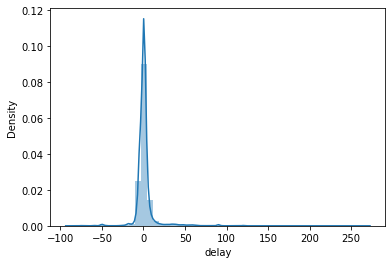

In [53]:
# distribution of the target column 
# right skewed distribution
# outliers present but not that significant 
sns.distplot(y_train)

In [54]:
main_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
delay                              int64
dtype: object

In [55]:
X_train.nunique()

business_code                 4
cust_number                1214
name_customer              3364
clear_date                  286
buisness_year                 1
doc_id                    26605
posting_date                275
document_create_date.1      275
due_in_date                 340
invoice_currency              2
document type                 2
total_open_amount         24390
baseline_create_date        284
cust_payment_terms           18
invoice_id                26605
dtype: int64

## BAR CHART REPRESENTATION

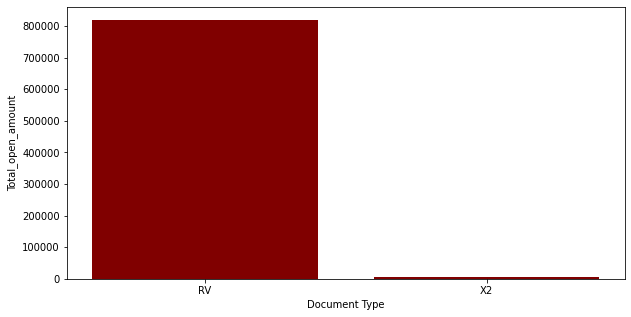

In [56]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(X_train['document type'],X_train['total_open_amount'], color ='maroon',
        width = 0.8)
 
plt.xlabel("Document Type")
plt.ylabel("Total_open_amount")
plt.show()

###### INFERENCE: we can see most of the total_open_amount are done by document type 'RV'

## BAR CHART 2

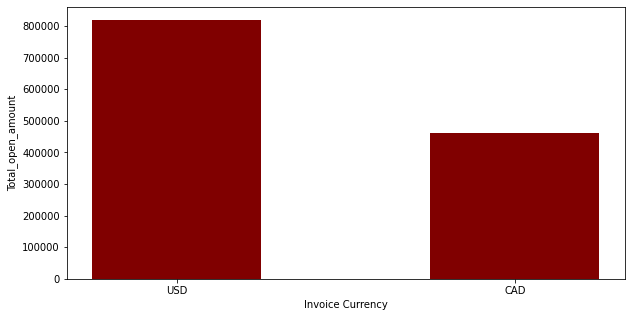

In [57]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(X_train['invoice_currency'],X_train['total_open_amount'], color ='maroon',
        width = 0.5)
 
plt.xlabel("Invoice Currency")
plt.ylabel("Total_open_amount")
plt.show()

###### Inference: It shows the transactions done by invoice currency and they  are mostly done by USD 

## LINE PLOT

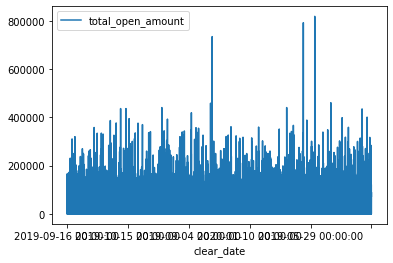

In [58]:
lines = df.plot.line(x='clear_date', y='total_open_amount')
#No direct trend

###### INFERENCE: Major clear dates range from 0-450000 amount

## BOX PLOT

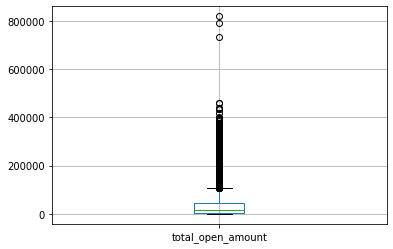

In [59]:
boxplot = df.boxplot(column=['total_open_amount'])

###### INFERENCE: Outliers are less in total_open_amount and they range in 800000

# SCATTER PLOT

<AxesSubplot:xlabel='delay', ylabel='posting_date'>

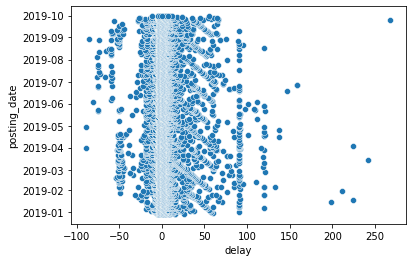

In [60]:
#No direct trend
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="posting_date")

# FEATURE ENGINEERING

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26605 entries, 47749 to 14566
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           26605 non-null  object        
 1   cust_number             26605 non-null  object        
 2   name_customer           26605 non-null  object        
 3   clear_date              26605 non-null  datetime64[ns]
 4   buisness_year           26605 non-null  float64       
 5   doc_id                  26605 non-null  float64       
 6   posting_date            26605 non-null  datetime64[ns]
 7   document_create_date.1  26605 non-null  datetime64[ns]
 8   due_in_date             26605 non-null  datetime64[ns]
 9   invoice_currency        26605 non-null  object        
 10  document type           26605 non-null  object        
 11  total_open_amount       26605 non-null  float64       
 12  baseline_create_date    26605 non-null  da

### LABEL ENCODING OF THE COLUMNS

In [62]:
#label encoding business_code
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [63]:
X_train.drop(['business_code'], axis =1,inplace=True)
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

In [64]:
#Label Encoding Cust_number
cust_number_encoder = LabelEncoder()
cust_number_encoder.fit(X_train['cust_number'])
X_train['cust_number_enc'] = cust_number_encoder.transform(X_train['cust_number'])

#Error !!!!!: Since X_val new catagories of routes are seen hence we have to explicitly add them to class 
#X_val['cust_number_enc'] = cust_number_encoder.transform(X_val['cust_number'])
#X_test['cust_number_enc'] = cust_number_encoder.transform(X_test['cust_number'])

In [65]:
# finding what are the new catagories in the validation set
diff = set(X_val['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)


In [66]:
X_val['cust_number_enc'] = cust_number_encoder.transform(X_val['cust_number'])

In [67]:
#doing same for test set
diff2 = set(X_test['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in diff2:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)

In [68]:
X_test['cust_number_enc'] =cust_number_encoder.transform(X_test['cust_number'])

In [69]:
#changing the datatype of cust_number_enc to int
X_train['cust_number_enc'].astype(int)

47749    711
14492    711
1873     711
26446    661
43521    711
        ... 
46120    778
32185    733
12128    302
36794    777
14566    777
Name: cust_number_enc, Length: 26605, dtype: int32

In [70]:
# function will delete a column from train , val and test
def delete_cols(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [71]:
#deleting cust_number from train,validation and test set
X_train ,X_val, X_test = delete_cols(['cust_number'])

In [72]:
#label encoding name_customer
from sklearn.preprocessing import LabelEncoder
name_customer_encoder = LabelEncoder()
name_customer_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc'] = name_customer_encoder.transform(X_train['name_customer'])

#Error !!!!!: Since X_val new catagories of routes are seen hence we have to explicitly add them to class
#X_val['name_customer_enc'] = name_customer_encoder.transform(X_val['name_customer'])
#X_test['name_customer_enc'] = name_customer_encoder.transform(X_test['name_customer'])

In [73]:
# finding what are the new catagories in the validation set
diff3 = set(X_val['name_customer'])-set(name_customer_encoder.classes_)

# adding them to the classess variable // 
for items in diff3:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)

In [74]:
X_val['name_customer_enc'] = name_customer_encoder.transform(X_val['name_customer'])

In [75]:
#doing same for test set
diff4 = set(X_test['name_customer'])-set(name_customer_encoder.classes_)

# adding them to the classess variable // 
for items in diff4:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)


In [76]:
X_test['name_customer_enc'] = name_customer_encoder.transform(X_test['name_customer'])

In [77]:
X_train[['name_customer_enc','name_customer']]

,name_customer_enc,name_customer
47749,3251,WAL-MAR
14492,3255,WAL-MAR corporation
1873,3261,WAL-MAR us
26446,3032,TARG corp
43521,3252,WAL-MAR associates
...,...,...
46120,670,COST associates
32185,376,BOZZU corporation
12128,681,COSTCO associates
36794,1875,M corp


In [78]:
#deleting customer_name from train,validation and test set
X_train ,X_val, X_test = delete_cols(['name_customer'])

In [79]:
#label encoding invoice_currency

invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_train['invoice_currency'])
X_train['invoice_currency_enc'] = invoice_currency_encoder.transform(X_train['invoice_currency'])
X_val['invoice_currency_enc'] = invoice_currency_encoder.transform(X_val['invoice_currency'])
X_test['invoice_currency_enc'] = invoice_currency_encoder.transform(X_test['invoice_currency'])

In [80]:
#deleting invoice_currency after encoding
X_train ,X_val, X_test = delete_cols(['invoice_currency'])

In [81]:
#label encoding document type

document_type_encoder = LabelEncoder()
document_type_encoder.fit(X_train['document type'])
X_train['document_type_enc'] = document_type_encoder.transform(X_train['document type'])
X_val['document_type_enc'] = document_type_encoder.transform(X_val['document type'])
X_test['document_type_enc'] = document_type_encoder.transform(X_test['document type'])

In [82]:
#deleting document type after encoding
X_train ,X_val, X_test = delete_cols(['document type'])

In [83]:
#label encoding cust_payment_terms

cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_test['cust_payment_terms'])

In [84]:
# finding what are the new catagories in the validation set
diff5 = set(X_val['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)

# adding them to the classess variable // 
for items in diff5:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)

In [85]:
X_val['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_val['cust_payment_terms'])

In [86]:
#doing same for test set
diff6 = set(X_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)

# adding them to the classess variable // 
for items in diff6:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)

In [87]:
X_train[['cust_payment_terms_enc','cust_payment_terms']]

,cust_payment_terms_enc,cust_payment_terms
47749,13,NAH4
14492,13,NAH4
1873,13,NAH4
26446,7,NAA8
43521,13,NAH4
...,...,...
46120,8,NAAX
32185,7,NAA8
12128,4,CA10
36794,7,NAA8


In [88]:
#deleting cust_payment_terms
X_train ,X_val, X_test = delete_cols(['cust_payment_terms'])

In [89]:
#extract day,month and year -> posting_date 

X_train['day_of_posting_date'] = X_train['posting_date'].dt.day
X_train['month_of_posting_date'] = X_train['posting_date'].dt.month
X_train['year_of_posting_date'] = X_train['posting_date'].dt.year

X_val['day_of_posting_date'] = X_val['posting_date'].dt.day
X_val['month_of_posting_date'] = X_val['posting_date'].dt.month
X_val['year_of_posting_date'] = X_val['posting_date'].dt.year


X_test['day_of_posting_date'] = X_test['posting_date'].dt.day
X_test['month_of_posting_date'] = X_test['posting_date'].dt.month
X_test['year_of_posting_date'] = X_test['posting_date'].dt.year

In [90]:
#dleting posting_date
X_train ,X_val, X_test = delete_cols(['posting_date'])

In [91]:
#extract day,month and year -> document_create_date.1 

X_train['day_of_document_create_date.1'] = X_train['document_create_date.1'].dt.day
X_train['month_of_document_create_date.1'] = X_train['document_create_date.1'].dt.month
X_train['year_of_document_create_date.1'] = X_train['document_create_date.1'].dt.year

X_val['day_of_document_create_date.1'] = X_val['document_create_date.1'].dt.day
X_val['month_of_document_create_date.1'] = X_val['document_create_date.1'].dt.month
X_val['year_of_document_create_date.1'] = X_val['document_create_date.1'].dt.year


X_test['day_of_document_create_date.1'] = X_test['document_create_date.1'].dt.day
X_test['month_of_document_create_date.1'] = X_test['document_create_date.1'].dt.month
X_test['year_of_document_create_date.1'] = X_test['document_create_date.1'].dt.year

In [92]:
#deleting document_create_date.1
X_train ,X_val, X_test = delete_cols(['document_create_date.1'])

In [93]:
#extract day,month and year -> baseline_create_date

X_train['day_of_baseline_create_date'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baseline_create_date'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baseline_create_date'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baseline_create_date'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baseline_create_date'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baseline_create_date'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baseline_create_date'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baseline_create_date'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baseline_create_date'] = X_test['baseline_create_date'].dt.year

In [94]:
#deleting baseline_create_date
X_train ,X_val, X_test = delete_cols(['baseline_create_date'])

In [95]:
#extract day,month and year -> clear_date 

X_train['day_of_clear_date'] = X_train['clear_date'].dt.day
X_train['month_of_clear_date'] = X_train['clear_date'].dt.month
X_train['year_of_clear_date'] = X_train['clear_date'].dt.year

X_val['day_of_clear_date'] = X_val['clear_date'].dt.day
X_val['month_of_clear_date'] = X_val['clear_date'].dt.month
X_val['year_of_clear_date'] = X_val['clear_date'].dt.year


X_test['day_of_clear_date'] = X_test['clear_date'].dt.day
X_test['month_of_clear_date'] = X_test['clear_date'].dt.month
X_test['year_of_clear_date'] = X_test['clear_date'].dt.year

In [96]:
#extract day,month and year -> due_in_date

X_train['day_of_due_in_date'] = X_train['due_in_date'].dt.day
X_train['month_of_due_in_date'] = X_train['due_in_date'].dt.month
X_train['year_of_due_in_date'] = X_train['due_in_date'].dt.year

X_val['day_of_due_in_date'] = X_val['due_in_date'].dt.day
X_val['month_of_due_in_date'] = X_val['due_in_date'].dt.month
X_val['year_of_due_in_date'] = X_val['due_in_date'].dt.year


X_test['day_of_due_in_date'] = X_test['due_in_date'].dt.day
X_test['month_of_due_in_date'] = X_test['due_in_date'].dt.month
X_test['year_of_due_in_date'] = X_test['due_in_date'].dt.year

In [102]:
#deleting clear_date and due_in_date
X_train ,X_val, X_test = delete_cols(['clear_date','due_in_date'])

# FEATURE SELECTION

<AxesSubplot:title={'center':'Correlation of Features'}>

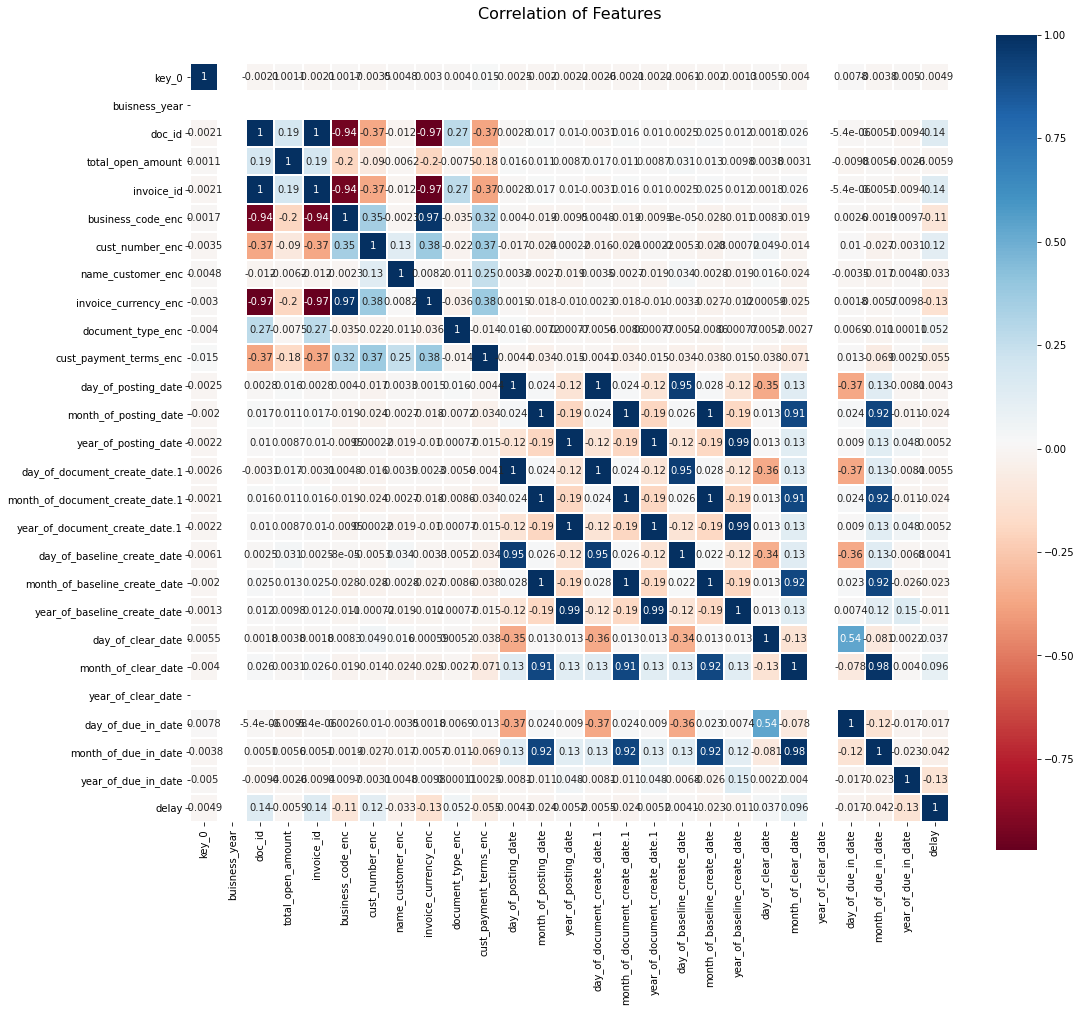

In [103]:
colormap = plt.cm.RdBu
plt.figure(figsize=(17,15))
plt.title('Correlation of Features', y=1.05, size=16)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [104]:
correlation = X_train.corr()


<AxesSubplot:>

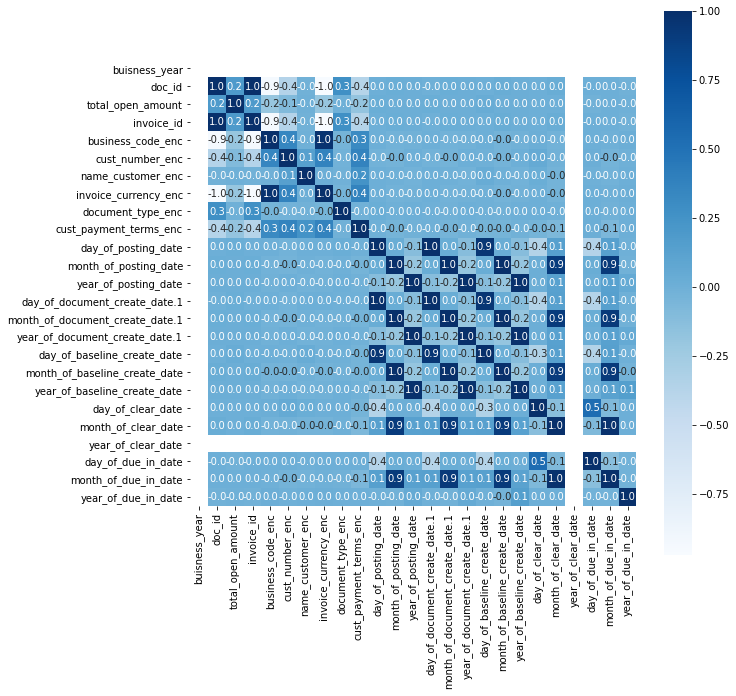

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

<AxesSubplot:>

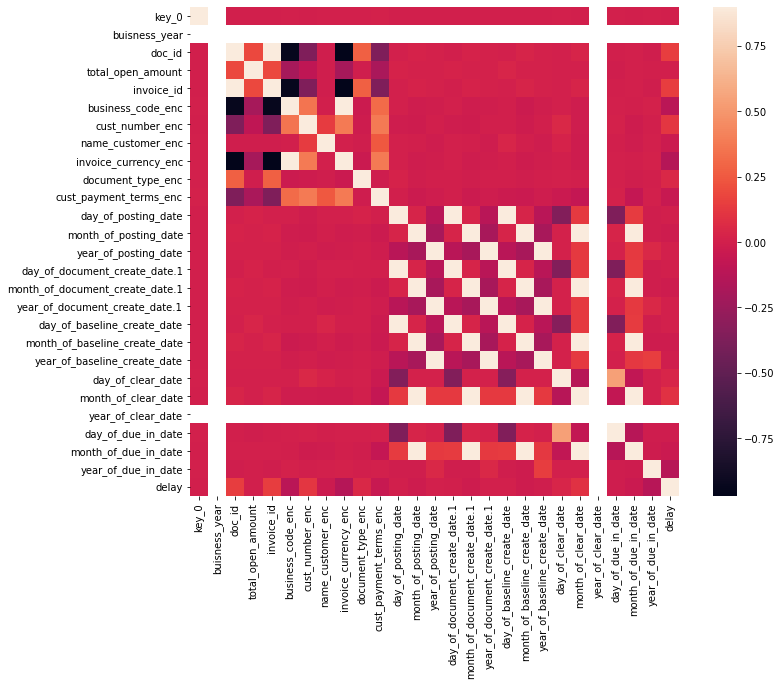

In [106]:
corrmat = X_train.merge(y_train , on = X_train.index).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

##### Here we can see business_year is constant and we can drop it

In [245]:
#As we have to find clear_date in test set ,we will drop it
#If we model our train set including clear_date,it will throw error in test set
X_train ,X_val, X_test = delete_cols(['day_of_clear_date','month_of_clear_date','year_of_clear_date'])

# MODELLING

#####    1)First we create Base Model 
#####    2)Then fir into the Model

In [279]:
#Since our problem statement is a regression problem 
#first we will try Linear Regression
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [280]:
y_predict = base_model.predict(X_val)
print(y_predict)

[ 8.04009655 -0.65024334  1.65053007 ...  0.8378262   2.53937558
 -5.30517093]


In [281]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

7.716268990453375

In [282]:
#using decision tree model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [283]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [284]:
y_predict2 = regressor.predict(X_val)

In [285]:
mean_squared_error(y_val, y_predict2, squared=False)

6.1185204770895725

In [286]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=11)
clf = clf.fit(X_train,y_train)


In [287]:
y_predict3 = clf.predict(X_val)

In [288]:
mean_squared_error(y_val, y_predict3, squared=False)

6.312498862296199

In [289]:
#predicting test value
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

8.343501011962

In [291]:
y_predict_test2 = base_model.predict(X_test)
mean_squared_error(y_test, y_predict_test2, squared=False)

67.45903543378

In [278]:
y_predict_test3 = clf.predict(X_test)
mean_squared_error(y_test, y_predict_test3, squared=False)

8.751059490112526

# WORKING ON TEST DATA WHERE CLEAR_DATE IS NULL.

In [166]:
#all the clear_date are null
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,U001,0200048886,SHERWO us,NaN,2020.0,1.930693e+09,2020-03-25,20200325,20200409.0,USD,RV,1.0,73728.45,20200325.0,NAA8,1.930693e+09,1
7,U001,0100054178,ROUNDY corp,NaN,2020.0,1.930724e+09,2020-04-08,20200408,20200423.0,USD,RV,1.0,5562.00,20200408.0,NAA8,1.930724e+09,1
9,U001,0200792293,UNIFIE trust,NaN,2020.0,1.930761e+09,2020-04-07,20200407,20200422.0,USD,RV,1.0,24206.42,20200407.0,NAA8,1.930761e+09,1
16,CA02,0140104409,LOB us,NaN,2020.0,2.960621e+09,2020-03-17,20200317,20200403.0,CAD,RV,1.0,91557.19,20200324.0,CA10,2.960621e+09,1
18,CA02,0140106408,WAL-M co,NaN,2020.0,2.960618e+09,2020-03-13,20200313,20200323.0,CAD,RV,1.0,51000.15,20200313.0,CA10,2.960618e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,U013,0100011958,IND systems,NaN,2020.0,1.991842e+09,2020-04-02,20200402,20200517.0,USD,RV,1.0,14714.26,20200402.0,NAVF,1.991842e+09,1
49976,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930586e+09,2020-03-02,20200302,20200317.0,USD,RV,1.0,1991.84,20200302.0,NAH4,1.930586e+09,1
49980,U001,0200780383,MEIJ corporation,NaN,2020.0,1.930718e+09,2020-03-30,20200330,20200414.0,USD,RV,1.0,121990.55,20200330.0,NAA8,1.930718e+09,1
49986,U001,0200799538,UNITE corporation,NaN,2020.0,1.930774e+09,2020-04-10,20200410,20200614.0,USD,RV,1.0,896.06,20200410.0,NAGD,1.930774e+09,1


###### we have to bring the main_test in same format as that of the X_train
##### In order to do that,we need perform following task
###### same preprocessing steps
###### same feature engg
###### same feature selection
###### fed to model and predict
######  NO EDA because it is performed only on train set i.e. X_train


# DATA PREPROCESSING


### NULL IMPUTATION

In [167]:
#no null values except clear_date :it is to be predicted
test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

## DATE/TIME CONVERSION

In [195]:
test.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
dtype: object

In [196]:
#changing clear_date,document_create_date.1,due_in_date,posting_date,baseline_create_date into datetime format
test['clear_date']=pd.to_datetime(test['clear_date'],format ='%Y-%m-%d %H:%M')
test['document_create_date.1']=pd.to_datetime(test['document_create_date.1'],format ='%Y%m%d')
test['due_in_date']=pd.to_datetime(test['due_in_date'],format ='%Y%m%d')
test['posting_date']=pd.to_datetime(test['posting_date'],format ='%Y-%m-%d')
test['baseline_create_date']=pd.to_datetime(test['baseline_create_date'],format = '%Y%m%d')

In [197]:
test.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
dtype: object

## Dropping Constant coloumn/duplicate coloumn

In [168]:
test.nunique()

business_code                5
cust_number                665
name_customer             1730
clear_date                   0
buisness_year                1
doc_id                    9715
posting_date                81
document_create_date.1      81
due_in_date                128
invoice_currency             2
document type                1
posting_id                   1
total_open_amount         9068
baseline_create_date        81
cust_payment_terms          43
invoice_id                9715
isOpen                       1
dtype: int64

In [169]:
test['business_code'].value_counts()

U001    9221
CA02     699
U013      53
U002      24
U005       3
Name: business_code, dtype: int64

In [171]:
# clubbing business_code with low occurance in dataset - to ensure model gets max information
test['business_code'] = np.where(test['business_code'].isin(["U002",
                                                             "U005"
                                                            ]),"Other codes",test['business_code'])

In [172]:
test['business_code'].value_counts()

U001           9221
CA02            699
U013             53
Other codes      27
Name: business_code, dtype: int64

In [173]:
test['cust_number'].value_counts()

0200769623    2634
0200762301     372
0200726979     361
0200759878     291
0200794332     280
              ... 
0200084659       1
200736337        1
0200732421       1
0100043933       1
200687594        1
Name: cust_number, Length: 665, dtype: int64

In [174]:
test['name_customer'].value_counts()

WAL-MAR co            276
WAL-MAR foundation    276
WAL-MAR associates    269
WAL-MAR systems       253
WAL-MAR llc           252
                     ... 
THE                     1
DOLLARA                 1
M trust                 1
TFC foundation          1
VITC systems            1
Name: name_customer, Length: 1730, dtype: int64

In [179]:
#clubing cust_payment_terms with occurence 1 as one
test['cust_payment_terms'] = np.where(test['cust_payment_terms'].isin(["NAUW",
                                                             "CAX2",
                                                             "NA3F",
                                                             "NAD4",
                                                             "NA25",
                                                            "NABD" ,"NAWU","CA30"                  
                                                            ]),"ONE",test['cust_payment_terms'])

In [180]:
#clubing cust_payment_terms with occurence 1 as one
test['cust_payment_terms'] = np.where(test['cust_payment_terms'].isin(["NAB1",
                                                             "NA3B",
                                                             "NAVD",
                                                             "NACE",
                                                             "CAB1",
                                                            "NACB" ,"NAM3","BR56","NAUP","C106","NACH" ,"NAVQ","NA84","NA38"
                                                            ]),"BELOW 10",test['cust_payment_terms'])

In [182]:
#clubing cust_payment_terms with occurence 1 as one
test['cust_payment_terms'] = np.where(test['cust_payment_terms'].isin(["ONE",
                                                             "NABG",
                                                             "NAVF",
                                                             "NAWP",
                                                             "NAVE",
                                                            "NAAW" ,"NAD5","NAM1","BELOW 10"
                                                            ]),"BELOW 60",test['cust_payment_terms'])

In [184]:
#clubing cust_payment_terms with occurence 1 as one
test['cust_payment_terms'] = np.where(test['cust_payment_terms'].isin(["NA32",
                                                             "NAX2",
                                                             "NAG2",
                                                             "NA10",
                                                            ]),"BELOW 100",test['cust_payment_terms'])

In [187]:
test['cust_payment_terms'].value_counts()

NAA8         4043
NAH4         3073
CA10          688
NAC6          399
BELOW 100     303
NAGD          294
NAAX          277
BELOW 60      265
NAM4          250
NAU5          194
NAD1          111
NAM2          103
Name: cust_payment_terms, dtype: int64

In [188]:
### Dropping Constant Coloumn: posting_id and isOpen since they are not related with any other feature.
test.drop('posting_id',axis=1,inplace=True)
test.drop('isOpen',axis=1,inplace=True)
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
3,U001,0200048886,SHERWO us,NaN,2020.0,1.930693e+09,2020-03-25,20200325,20200409.0,USD,RV,73728.45,20200325.0,NAA8,1.930693e+09
7,U001,0100054178,ROUNDY corp,NaN,2020.0,1.930724e+09,2020-04-08,20200408,20200423.0,USD,RV,5562.00,20200408.0,NAA8,1.930724e+09
9,U001,0200792293,UNIFIE trust,NaN,2020.0,1.930761e+09,2020-04-07,20200407,20200422.0,USD,RV,24206.42,20200407.0,NAA8,1.930761e+09
16,CA02,0140104409,LOB us,NaN,2020.0,2.960621e+09,2020-03-17,20200317,20200403.0,CAD,RV,91557.19,20200324.0,CA10,2.960621e+09
18,CA02,0140106408,WAL-M co,NaN,2020.0,2.960618e+09,2020-03-13,20200313,20200323.0,CAD,RV,51000.15,20200313.0,CA10,2.960618e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,U013,0100011958,IND systems,NaN,2020.0,1.991842e+09,2020-04-02,20200402,20200517.0,USD,RV,14714.26,20200402.0,BELOW 60,1.991842e+09
49976,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930586e+09,2020-03-02,20200302,20200317.0,USD,RV,1991.84,20200302.0,NAH4,1.930586e+09
49980,U001,0200780383,MEIJ corporation,NaN,2020.0,1.930718e+09,2020-03-30,20200330,20200414.0,USD,RV,121990.55,20200330.0,NAA8,1.930718e+09
49986,U001,0200799538,UNITE corporation,NaN,2020.0,1.930774e+09,2020-04-10,20200410,20200614.0,USD,RV,896.06,20200410.0,NAGD,1.930774e+09


### Removing duplicates

In [190]:
test.duplicated().sum()

285

In [191]:
test[test.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
446,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930594e+09,2020-03-04,20200304,20200319.0,USD,RV,63967.88,20200304.0,NAH4,1.930594e+09
2832,U001,0200759878,SA us,NaN,2020.0,1.930759e+09,2020-04-08,20200408,20200423.0,USD,RV,14109.75,20200408.0,NAH4,1.930759e+09
4345,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930717e+09,2020-03-30,20200330,20200414.0,USD,RV,12518.32,20200330.0,NAH4,1.930717e+09
5700,U001,0200743129,BROOKS us,NaN,2020.0,1.930759e+09,2020-04-09,20200409,20200424.0,USD,RV,16632.33,20200409.0,NAA8,1.930759e+09
6796,U001,0200756072,REINHA corporation,NaN,2020.0,1.930671e+09,2020-03-19,20200319,20200403.0,USD,RV,19857.34,20200319.0,NAA8,1.930671e+09
7312,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930853e+09,2020-05-03,20200503,20200518.0,USD,RV,650.81,20200503.0,NAH4,1.930853e+09
7532,CA02,140105847,GORDON F trust,NaN,2020.0,2.960632e+09,2020-04-30,20200430,20200517.0,CAD,RV,1728.00,20200507.0,CA10,2.960632e+09
7831,U001,0200775094,SAVE M foundation,NaN,2020.0,1.930701e+09,2020-03-25,20200325,20200409.0,USD,RV,67035.30,20200325.0,NAA8,1.930701e+09
7959,U001,0200749782,KROG corp,NaN,2020.0,1.930659e+09,2020-03-17,20200317,20200401.0,USD,RV,39850.90,20200317.0,NAA8,1.930659e+09
8007,U001,0200759878,SA us,NaN,2020.0,1.930775e+09,2020-04-11,20200411,20200426.0,USD,RV,40404.96,20200411.0,NAH4,1.930775e+09


In [192]:
test.drop_duplicates(inplace=True)

In [193]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
3,U001,0200048886,SHERWO us,NaN,2020.0,1.930693e+09,2020-03-25,20200325,20200409.0,USD,RV,73728.45,20200325.0,NAA8,1.930693e+09
7,U001,0100054178,ROUNDY corp,NaN,2020.0,1.930724e+09,2020-04-08,20200408,20200423.0,USD,RV,5562.00,20200408.0,NAA8,1.930724e+09
9,U001,0200792293,UNIFIE trust,NaN,2020.0,1.930761e+09,2020-04-07,20200407,20200422.0,USD,RV,24206.42,20200407.0,NAA8,1.930761e+09
16,CA02,0140104409,LOB us,NaN,2020.0,2.960621e+09,2020-03-17,20200317,20200403.0,CAD,RV,91557.19,20200324.0,CA10,2.960621e+09
18,CA02,0140106408,WAL-M co,NaN,2020.0,2.960618e+09,2020-03-13,20200313,20200323.0,CAD,RV,51000.15,20200313.0,CA10,2.960618e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,U013,0100011958,IND systems,NaN,2020.0,1.991842e+09,2020-04-02,20200402,20200517.0,USD,RV,14714.26,20200402.0,BELOW 60,1.991842e+09
49976,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930586e+09,2020-03-02,20200302,20200317.0,USD,RV,1991.84,20200302.0,NAH4,1.930586e+09
49980,U001,0200780383,MEIJ corporation,NaN,2020.0,1.930718e+09,2020-03-30,20200330,20200414.0,USD,RV,121990.55,20200330.0,NAA8,1.930718e+09
49986,U001,0200799538,UNITE corporation,NaN,2020.0,1.930774e+09,2020-04-10,20200410,20200614.0,USD,RV,896.06,20200410.0,NAGD,1.930774e+09


## Adding the target coloumn in test set :delay coloumn

In [198]:
test['delay']=""

In [199]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
3,U001,0200048886,SHERWO us,NaT,2020.0,1.930693e+09,2020-03-25,2020-03-25,2020-04-09,USD,RV,73728.45,2020-03-25,NAA8,1.930693e+09,
7,U001,0100054178,ROUNDY corp,NaT,2020.0,1.930724e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,5562.00,2020-04-08,NAA8,1.930724e+09,
9,U001,0200792293,UNIFIE trust,NaT,2020.0,1.930761e+09,2020-04-07,2020-04-07,2020-04-22,USD,RV,24206.42,2020-04-07,NAA8,1.930761e+09,
16,CA02,0140104409,LOB us,NaT,2020.0,2.960621e+09,2020-03-17,2020-03-17,2020-04-03,CAD,RV,91557.19,2020-03-24,CA10,2.960621e+09,
18,CA02,0140106408,WAL-M co,NaT,2020.0,2.960618e+09,2020-03-13,2020-03-13,2020-03-23,CAD,RV,51000.15,2020-03-13,CA10,2.960618e+09,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,U013,0100011958,IND systems,NaT,2020.0,1.991842e+09,2020-04-02,2020-04-02,2020-05-17,USD,RV,14714.26,2020-04-02,BELOW 60,1.991842e+09,
49976,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930586e+09,2020-03-02,2020-03-02,2020-03-17,USD,RV,1991.84,2020-03-02,NAH4,1.930586e+09,
49980,U001,0200780383,MEIJ corporation,NaT,2020.0,1.930718e+09,2020-03-30,2020-03-30,2020-04-14,USD,RV,121990.55,2020-03-30,NAA8,1.930718e+09,
49986,U001,0200799538,UNITE corporation,NaT,2020.0,1.930774e+09,2020-04-10,2020-04-10,2020-06-14,USD,RV,896.06,2020-04-10,NAGD,1.930774e+09,


## Spliting the test set in x_test which does not contain target coloumn i.e. delay

In [200]:
x_test=test.drop(['delay'],axis=1)
x_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
3,U001,0200048886,SHERWO us,NaT,2020.0,1.930693e+09,2020-03-25,2020-03-25,2020-04-09,USD,RV,73728.45,2020-03-25,NAA8,1.930693e+09
7,U001,0100054178,ROUNDY corp,NaT,2020.0,1.930724e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,5562.00,2020-04-08,NAA8,1.930724e+09
9,U001,0200792293,UNIFIE trust,NaT,2020.0,1.930761e+09,2020-04-07,2020-04-07,2020-04-22,USD,RV,24206.42,2020-04-07,NAA8,1.930761e+09
16,CA02,0140104409,LOB us,NaT,2020.0,2.960621e+09,2020-03-17,2020-03-17,2020-04-03,CAD,RV,91557.19,2020-03-24,CA10,2.960621e+09
18,CA02,0140106408,WAL-M co,NaT,2020.0,2.960618e+09,2020-03-13,2020-03-13,2020-03-23,CAD,RV,51000.15,2020-03-13,CA10,2.960618e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,U013,0100011958,IND systems,NaT,2020.0,1.991842e+09,2020-04-02,2020-04-02,2020-05-17,USD,RV,14714.26,2020-04-02,BELOW 60,1.991842e+09
49976,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930586e+09,2020-03-02,2020-03-02,2020-03-17,USD,RV,1991.84,2020-03-02,NAH4,1.930586e+09
49980,U001,0200780383,MEIJ corporation,NaT,2020.0,1.930718e+09,2020-03-30,2020-03-30,2020-04-14,USD,RV,121990.55,2020-03-30,NAA8,1.930718e+09
49986,U001,0200799538,UNITE corporation,NaT,2020.0,1.930774e+09,2020-04-10,2020-04-10,2020-06-14,USD,RV,896.06,2020-04-10,NAGD,1.930774e+09


In [202]:
#dropping delay from test
test.drop(['delay'], inplace =True,axis=1)

In [203]:
x_test.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
dtype: object

In [205]:
#droping clear_date from x_test
x_test.drop(['clear_date'],axis=1,inplace=True)

In [206]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9715 entries, 3 to 49996
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9715 non-null   object        
 1   cust_number             9715 non-null   object        
 2   name_customer           9715 non-null   object        
 3   buisness_year           9715 non-null   float64       
 4   doc_id                  9715 non-null   float64       
 5   posting_date            9715 non-null   datetime64[ns]
 6   document_create_date.1  9715 non-null   datetime64[ns]
 7   due_in_date             9715 non-null   datetime64[ns]
 8   invoice_currency        9715 non-null   object        
 9   document type           9715 non-null   object        
 10  total_open_amount       9715 non-null   float64       
 11  baseline_create_date    9715 non-null   datetime64[ns]
 12  cust_payment_terms      9715 non-null   object 

In [208]:
X_train.dtypes

buisness_year                      float64
doc_id                             float64
total_open_amount                  float64
invoice_id                         float64
business_code_enc                    int32
cust_number_enc                      int32
name_customer_enc                    int32
invoice_currency_enc                 int32
document_type_enc                    int32
cust_payment_terms_enc               int32
day_of_posting_date                  int64
month_of_posting_date                int64
year_of_posting_date                 int64
day_of_document_create_date.1        int64
month_of_document_create_date.1      int64
year_of_document_create_date.1       int64
day_of_baseline_create_date          int64
month_of_baseline_create_date        int64
year_of_baseline_create_date         int64
day_of_clear_date                    int64
month_of_clear_date                  int64
year_of_clear_date                   int64
day_of_due_in_date                   int64
month_of_du

## Feature Engineering in the test set

In [207]:
x_test['business_code_enc'] = business_code_encoder.transform(x_test['business_code'])

In [228]:
x_test.drop(['business_code'],axis=1,inplace=True)

In [212]:
# finding what are the new catagories in the test set
temp = set(x_test['cust_number'])-set(cust_number_encoder.classes_)

# adding them to the classess variable // 
for items in temp:
    cust_number_encoder.classes_ = np.append(cust_number_encoder.classes_,items)


In [214]:
x_test['cust_number_enc'] = cust_number_encoder.transform(x_test['cust_number'])

In [229]:
x_test.drop(['cust_number'],axis=1,inplace=True)

In [216]:
# finding what are the new catagories in the validation set
temp2 = set(x_test['name_customer'])-set(name_customer_encoder.classes_)

# adding them to the classess variable // 
for items in temp2:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)

In [217]:
x_test['name_customer_enc'] = name_customer_encoder.transform(x_test['name_customer'])

In [230]:
x_test.drop(['name_customer'],axis=1,inplace=True)

In [218]:
x_test['invoice_currency_enc'] = invoice_currency_encoder.transform(x_test['invoice_currency'])

In [231]:
x_test.drop(['invoice_currency'],axis=1,inplace=True)

In [220]:
x_test['document_type_enc'] = document_type_encoder.transform(x_test['document type'])

In [232]:
x_test.drop(['document type'],axis=1,inplace=True)

In [233]:
# finding what are the new catagories in the test set
temp3= set(x_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)

# adding them to the classess variable // 
for items in temp3:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)

In [222]:
x_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(x_test['cust_payment_terms'])

In [234]:
x_test.drop(['cust_payment_terms'],axis=1,inplace=True)

In [223]:
x_test['day_of_posting_date'] = x_test['posting_date'].dt.day
x_test['month_of_posting_date'] = x_test['posting_date'].dt.month
x_test['year_of_posting_date'] = x_test['posting_date'].dt.year

In [235]:
x_test.drop(['posting_date'],axis=1,inplace=True)

In [224]:
x_test['day_of_document_create_date.1'] = x_test['document_create_date.1'].dt.day
x_test['month_of_document_create_date.1'] = x_test['document_create_date.1'].dt.month
x_test['year_of_document_create_date.1'] = x_test['document_create_date.1'].dt.year

In [236]:
x_test.drop(['document_create_date.1'],axis=1,inplace=True)

In [225]:
x_test['day_of_baseline_create_date'] = x_test['baseline_create_date'].dt.day
x_test['month_of_baseline_create_date'] = x_test['baseline_create_date'].dt.month
x_test['year_of_baseline_create_date'] = x_test['baseline_create_date'].dt.year

In [237]:
x_test.drop(['baseline_create_date'],axis=1,inplace=True)

In [226]:
x_test['day_of_due_in_date'] = x_test['due_in_date'].dt.day
x_test['month_of_due_in_date'] = x_test['due_in_date'].dt.month
x_test['year_of_due_in_date'] = x_test['due_in_date'].dt.year

In [238]:
x_test.drop(['due_in_date'],axis=1,inplace=True)

In [240]:
x_test.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'invoice_id',
       'business_code_enc', 'cust_number_enc', 'name_customer_enc',
       'invoice_currency_enc', 'document_type_enc', 'cust_payment_terms_enc',
       'day_of_posting_date', 'month_of_posting_date', 'year_of_posting_date',
       'day_of_document_create_date.1', 'month_of_document_create_date.1',
       'year_of_document_create_date.1', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'day_of_due_in_date', 'month_of_due_in_date', 'year_of_due_in_date'],
      dtype='object')

In [241]:
X_train.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'invoice_id',
       'business_code_enc', 'cust_number_enc', 'name_customer_enc',
       'invoice_currency_enc', 'document_type_enc', 'cust_payment_terms_enc',
       'day_of_posting_date', 'month_of_posting_date', 'year_of_posting_date',
       'day_of_document_create_date.1', 'month_of_document_create_date.1',
       'year_of_document_create_date.1', 'day_of_baseline_create_date',
       'month_of_baseline_create_date', 'year_of_baseline_create_date',
       'day_of_clear_date', 'month_of_clear_date', 'year_of_clear_date',
       'day_of_due_in_date', 'month_of_due_in_date', 'year_of_due_in_date'],
      dtype='object')

## Predicting Delay and Clear_date

In [302]:
#choosing random forest classifier model
delay_predicted = clf.predict(x_test)

In [303]:
delay_predicted = pd.Series(delay_predicted,name='delay')

In [304]:
#Resetting the index of test as it carries the indexing of original data frame.
test.reset_index(drop=True,inplace=True)

In [305]:
#merging the delay coloumn to see result test
result_test = test.merge(delay_predicted , on = x_test.index )

In [308]:
result_test

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,3,U001,0200048886,SHERWO us,NaT,2020.0,1.930693e+09,2020-03-25,2020-03-25,2020-04-09,USD,RV,73728.45,2020-03-25,NAA8,1.930693e+09,1
1,7,U001,0100054178,ROUNDY corp,NaT,2020.0,1.930724e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,5562.00,2020-04-08,NAA8,1.930724e+09,1
2,9,U001,0200792293,UNIFIE trust,NaT,2020.0,1.930761e+09,2020-04-07,2020-04-07,2020-04-22,USD,RV,24206.42,2020-04-07,NAA8,1.930761e+09,-1
3,16,CA02,0140104409,LOB us,NaT,2020.0,2.960621e+09,2020-03-17,2020-03-17,2020-04-03,CAD,RV,91557.19,2020-03-24,CA10,2.960621e+09,1
4,18,CA02,0140106408,WAL-M co,NaT,2020.0,2.960618e+09,2020-03-13,2020-03-13,2020-03-23,CAD,RV,51000.15,2020-03-13,CA10,2.960618e+09,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710,49972,U013,0100011958,IND systems,NaT,2020.0,1.991842e+09,2020-04-02,2020-04-02,2020-05-17,USD,RV,14714.26,2020-04-02,BELOW 60,1.991842e+09,-8
9711,49976,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930586e+09,2020-03-02,2020-03-02,2020-03-17,USD,RV,1991.84,2020-03-02,NAH4,1.930586e+09,-3
9712,49980,U001,0200780383,MEIJ corporation,NaT,2020.0,1.930718e+09,2020-03-30,2020-03-30,2020-04-14,USD,RV,121990.55,2020-03-30,NAA8,1.930718e+09,0
9713,49986,U001,0200799538,UNITE corporation,NaT,2020.0,1.930774e+09,2020-04-10,2020-04-10,2020-06-14,USD,RV,896.06,2020-04-10,NAGD,1.930774e+09,4


In [310]:
result_test['delay'] = result_test['delay'].astype(int)

In [314]:
#Finding clear_date
result_test['predicted_payment_date'] = result_test['due_in_date'] + pd.to_timedelta(result_test['delay'], unit='d')

In [1]:
result_test.drop(['clear_date'],axis=1)

NameError: name 'result_test' is not defined

In [318]:
result_test

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,clear_date,predicted_payment_date
0,3,U001,0200048886,SHERWO us,NaT,2020.0,1.930693e+09,2020-03-25,2020-03-25,2020-04-09,USD,RV,73728.45,2020-03-25,NAA8,1.930693e+09,1,2020-04-10,2020-04-10
1,7,U001,0100054178,ROUNDY corp,NaT,2020.0,1.930724e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,5562.00,2020-04-08,NAA8,1.930724e+09,1,2020-04-24,2020-04-24
2,9,U001,0200792293,UNIFIE trust,NaT,2020.0,1.930761e+09,2020-04-07,2020-04-07,2020-04-22,USD,RV,24206.42,2020-04-07,NAA8,1.930761e+09,-1,2020-04-21,2020-04-21
3,16,CA02,0140104409,LOB us,NaT,2020.0,2.960621e+09,2020-03-17,2020-03-17,2020-04-03,CAD,RV,91557.19,2020-03-24,CA10,2.960621e+09,1,2020-04-04,2020-04-04
4,18,CA02,0140106408,WAL-M co,NaT,2020.0,2.960618e+09,2020-03-13,2020-03-13,2020-03-23,CAD,RV,51000.15,2020-03-13,CA10,2.960618e+09,8,2020-03-31,2020-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710,49972,U013,0100011958,IND systems,NaT,2020.0,1.991842e+09,2020-04-02,2020-04-02,2020-05-17,USD,RV,14714.26,2020-04-02,BELOW 60,1.991842e+09,-8,2020-05-09,2020-05-09
9711,49976,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930586e+09,2020-03-02,2020-03-02,2020-03-17,USD,RV,1991.84,2020-03-02,NAH4,1.930586e+09,-3,2020-03-14,2020-03-14
9712,49980,U001,0200780383,MEIJ corporation,NaT,2020.0,1.930718e+09,2020-03-30,2020-03-30,2020-04-14,USD,RV,121990.55,2020-03-30,NAA8,1.930718e+09,0,2020-04-14,2020-04-14
9713,49986,U001,0200799538,UNITE corporation,NaT,2020.0,1.930774e+09,2020-04-10,2020-04-10,2020-06-14,USD,RV,896.06,2020-04-10,NAGD,1.930774e+09,4,2020-06-18,2020-06-18


# BUCKETIZATION

In [319]:
#function for Bucketization
def bucketize(delay):
    if delay<=0:
        return "Bucket 1"
    elif delay>0 and delay<=15:
        return "Bucket 2"
    elif delay>15 and delay<=30:
        return "Bucket 3"
    elif delay>30 and delay<=45:
        return "Bucket 4"
    elif delay>45 and delay<=60:
        return "Bucket 5"
    elif delay>60 and delay<=75:
        return "Bucket 6"
    else:
        return "Bucket 7"

In [323]:
#assigning the bucketization function to the coloumn Ageing_Bucket using apply and lamba
result_test['Ageing_Bucket']=result_test.apply(lambda row:bucketize(row['delay']),axis=1)

In [324]:
result_test

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,clear_date,predicted_payment_date,Ageing_Bucket
0,3,U001,0200048886,SHERWO us,NaT,2020.0,1.930693e+09,2020-03-25,2020-03-25,2020-04-09,USD,RV,73728.45,2020-03-25,NAA8,1.930693e+09,1,2020-04-10,2020-04-10,Bucket 2
1,7,U001,0100054178,ROUNDY corp,NaT,2020.0,1.930724e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,5562.00,2020-04-08,NAA8,1.930724e+09,1,2020-04-24,2020-04-24,Bucket 2
2,9,U001,0200792293,UNIFIE trust,NaT,2020.0,1.930761e+09,2020-04-07,2020-04-07,2020-04-22,USD,RV,24206.42,2020-04-07,NAA8,1.930761e+09,-1,2020-04-21,2020-04-21,Bucket 1
3,16,CA02,0140104409,LOB us,NaT,2020.0,2.960621e+09,2020-03-17,2020-03-17,2020-04-03,CAD,RV,91557.19,2020-03-24,CA10,2.960621e+09,1,2020-04-04,2020-04-04,Bucket 2
4,18,CA02,0140106408,WAL-M co,NaT,2020.0,2.960618e+09,2020-03-13,2020-03-13,2020-03-23,CAD,RV,51000.15,2020-03-13,CA10,2.960618e+09,8,2020-03-31,2020-03-31,Bucket 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710,49972,U013,0100011958,IND systems,NaT,2020.0,1.991842e+09,2020-04-02,2020-04-02,2020-05-17,USD,RV,14714.26,2020-04-02,BELOW 60,1.991842e+09,-8,2020-05-09,2020-05-09,Bucket 1
9711,49976,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930586e+09,2020-03-02,2020-03-02,2020-03-17,USD,RV,1991.84,2020-03-02,NAH4,1.930586e+09,-3,2020-03-14,2020-03-14,Bucket 1
9712,49980,U001,0200780383,MEIJ corporation,NaT,2020.0,1.930718e+09,2020-03-30,2020-03-30,2020-04-14,USD,RV,121990.55,2020-03-30,NAA8,1.930718e+09,0,2020-04-14,2020-04-14,Bucket 1
9713,49986,U001,0200799538,UNITE corporation,NaT,2020.0,1.930774e+09,2020-04-10,2020-04-10,2020-06-14,USD,RV,896.06,2020-04-10,NAGD,1.930774e+09,4,2020-06-18,2020-06-18,Bucket 2


# END